In [1]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
num_classes = 10

#loading data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#normalization. Each pixel has value 0-255, hence by dividing by 255 we attain a value between 0 and 1.
x_train, x_test = x_train / 255.0, x_test / 255.0

#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [3]:
#CNN Model Architecture:

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(rate = 0.2),
    
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(rate = 0.3),
    
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(rate = 0.4),
    
    layers.Dense(num_classes, activation = 'softmax')
])

In [4]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0

In [26]:
tf.keras.utils.plot_model(cnn_model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [5]:
#Early stoppage callback function
overfitCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta = 0.0025, patience = 30, restore_best_weights=True)

#Model training
cnn = cnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size = 100, callbacks=[overfitCallback])

Epoch 1/300
500/500 [==============================] - 11s 16ms/step - loss: 1.4198 - accuracy: 0.4830 - val_loss: 1.7447 - val_accuracy: 0.3643
Epoch 2/300
500/500 [==============================] - 8s 16ms/step - loss: 1.0585 - accuracy: 0.6230 - val_loss: 1.1805 - val_accuracy: 0.5981
Epoch 3/300
500/500 [==============================] - 8s 16ms/step - loss: 0.9038 - accuracy: 0.6833 - val_loss: 1.0965 - val_accuracy: 0.6169
Epoch 4/300
500/500 [==============================] - 8s 16ms/step - loss: 0.8084 - accuracy: 0.7202 - val_loss: 1.5629 - val_accuracy: 0.5463
Epoch 5/300
500/500 [==============================] - 8s 16ms/step - loss: 0.7359 - accuracy: 0.7444 - val_loss: 0.6948 - val_accuracy: 0.7589
Epoch 6/300
500/500 [==============================] - 8s 16ms/step - loss: 0.6882 - accuracy: 0.7626 - val_loss: 0.9178 - val_accuracy: 0.6780
Epoch 7/300
500/500 [==============================] - 8s 16ms/step - loss: 0.6425 - accuracy: 0.7787 - val_loss: 0.7351 - val_accuracy

Text(0, 0.5, 'Accuracy')

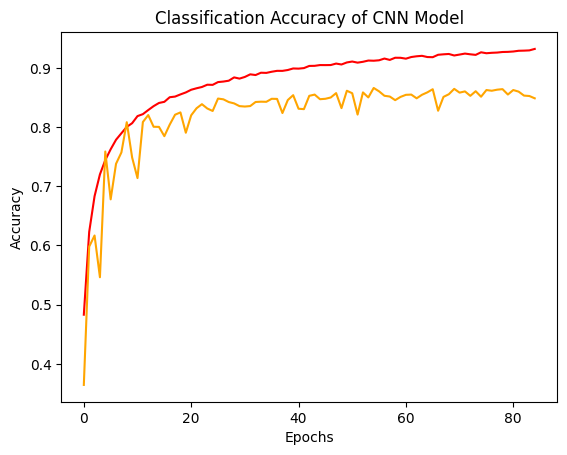

In [6]:
#CNN model Classification Accuracy

plt.title('Classification Accuracy of CNN Model')
plt.plot(cnn.history['accuracy'], color='red', label='train')
plt.plot(cnn.history['val_accuracy'], color='orange', label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

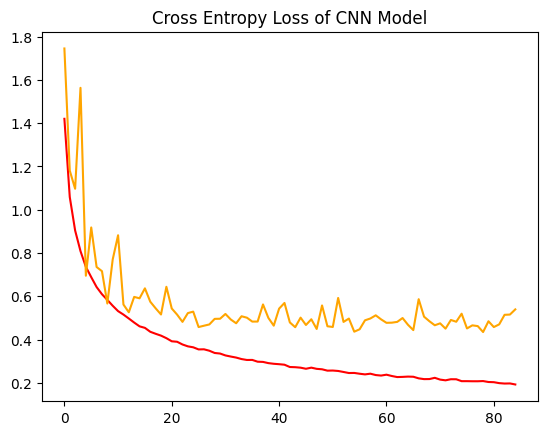

In [7]:
#CNN model Cross Entropy Loss

plt.title('Cross Entropy Loss of CNN Model')
plt.plot(cnn.history['loss'], color='red', label='train')
plt.plot(cnn.history['val_loss'], color='orange', label='test')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")

In [8]:
#Using best fit model from training to predict on test data
y_pred_cnn =(cnn_model.predict(x_test))

#Calculation of Accuracy of model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test)
print("Test Accuracy: ", cnn_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4363 - accuracy: 0.8663
Test Accuracy:  0.8662999868392944


<Axes: >

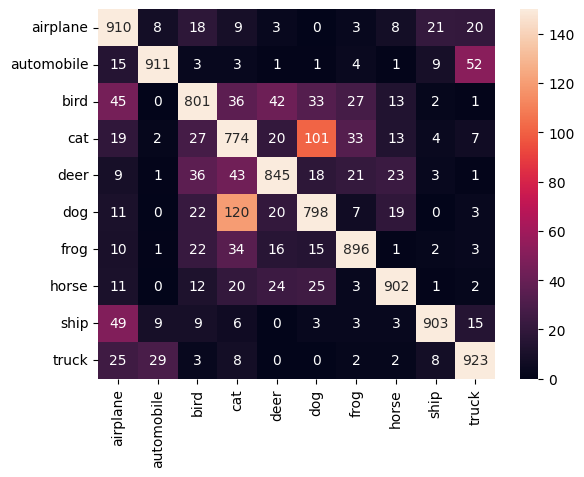

In [9]:
#Confusion matrix plot
cf_matrix = confusion_matrix(y_test.argmax(1),y_pred_cnn.argmax(1))

#Seaborn confusion matrix visualization
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
sns.heatmap(cf_matrix, annot=True, fmt="d",  xticklabels = class_names, yticklabels = class_names, vmin=0, vmax=150)


In [10]:
###################################################################################################
###################################################################################################
###################################################################################################

In [11]:
#Deep Neural Network Architecture without convolutions:

dnn_model = models.Sequential([

    layers.Flatten(input_shape=(32, 32, 3)),
    
    layers.Dense(2048),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    keras.layers.Dropout(rate=0.3),
    
    layers.Dense(1024),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    keras.layers.Dropout(rate=0.2),
    
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    keras.layers.Dropout(rate=0.3),
    
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    keras.layers.Dropout(rate=0.4),
    
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    keras.layers.Dropout(rate=0.5),
    
    layers.Dense(num_classes, activation='softmax')
])

In [12]:
dnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_6 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 2048)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                      

In [13]:
#Early stoppage callback function
overfitCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta = 0.005, patience = 30, restore_best_weights=True)

#Model training
dnn = dnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size = 100, callbacks=[overfitCallback])

Epoch 1/300
500/500 [==============================] - 6s 9ms/step - loss: 1.9788 - accuracy: 0.3004 - val_loss: 1.9336 - val_accuracy: 0.3191
Epoch 2/300
500/500 [==============================] - 5s 9ms/step - loss: 1.6547 - accuracy: 0.4104 - val_loss: 1.8352 - val_accuracy: 0.3554
Epoch 3/300
500/500 [==============================] - 5s 10ms/step - loss: 1.5406 - accuracy: 0.4527 - val_loss: 1.7313 - val_accuracy: 0.3877
Epoch 4/300
500/500 [==============================] - 4s 8ms/step - loss: 1.4701 - accuracy: 0.4831 - val_loss: 1.7188 - val_accuracy: 0.3959
Epoch 5/300
500/500 [==============================] - 4s 8ms/step - loss: 1.4152 - accuracy: 0.5039 - val_loss: 1.6518 - val_accuracy: 0.4152
Epoch 6/300
500/500 [==============================] - 4s 9ms/step - loss: 1.3670 - accuracy: 0.5213 - val_loss: 1.5863 - val_accuracy: 0.4301
Epoch 7/300
500/500 [==============================] - 4s 9ms/step - loss: 1.3319 - accuracy: 0.5346 - val_loss: 1.5835 - val_accuracy: 0.441

Text(0, 0.5, 'Accuracy')

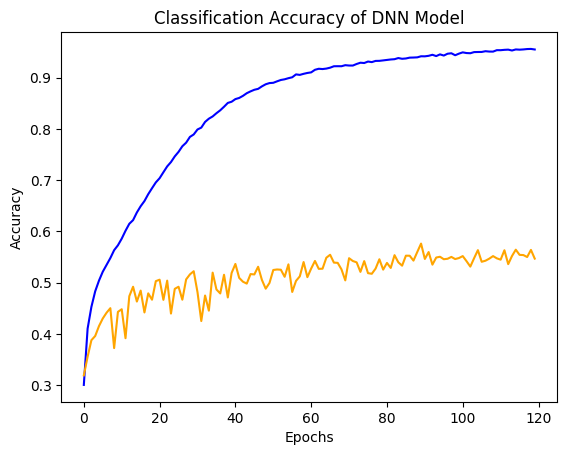

In [27]:
#DNN model Classification Accuracy

plt.title('Classification Accuracy of DNN Model')
plt.plot(dnn.history['accuracy'], color='blue', label='train')
plt.plot(dnn.history['val_accuracy'], color='orange', label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Cross Entropy Loss')

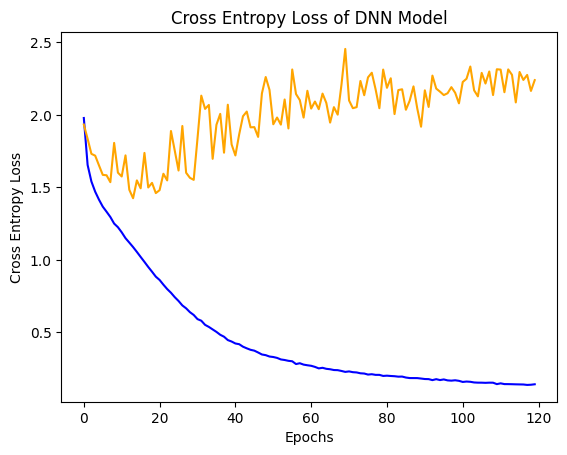

In [28]:
#DNN model Cross Entropy Loss

plt.title('Cross Entropy Loss of DNN Model')
plt.plot(dnn.history['loss'], color='blue', label='train')
plt.plot(dnn.history['val_loss'], color='orange', label='test')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")

In [19]:
#Using best fit model from training to predict on test data
y_pred_dnn =(dnn_model.predict(x_test))

#Calculation of Accuracy of model
dnn_loss, dnn_accuracy = dnn_model.evaluate(x_test, y_test)
print("Test Accuracy: ", dnn_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.9187 - accuracy: 0.5762
Test Accuracy:  0.576200008392334


<Axes: >

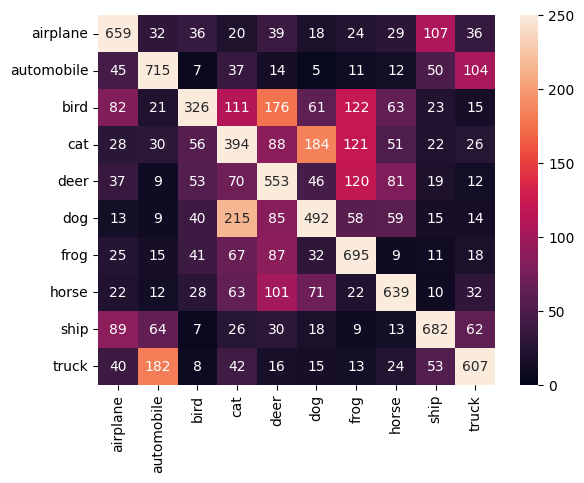

In [29]:
#Confusion matrix plot
cf_matrix = confusion_matrix(y_test.argmax(1),y_pred_dnn.argmax(1))

#Seaborn confusion matrix visualization
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
sns.heatmap(cf_matrix, annot=True, fmt="d",  xticklabels = class_names, yticklabels = class_names, vmin=0, vmax=250)
